In [1]:
import numpy as np
from sklearn import datasets


def _generating_data():
    random_state = 180
    X, _ = datasets.make_blobs(n_samples=50, n_features = 2, 
                               centers=3, cluster_std=[3, 2, 3], 
                               random_state=random_state)
    transformation = [[1.6, -0.6], [-0.8, 0.8]]
    X_aniso = np.dot(X, transformation)
    X_aniso[:,0] = X_aniso[:,0]-7
    X_aniso[:,1] = X_aniso[:,1]+17
    return X_aniso


X = _generating_data()
X_mean = np.mean(X, axis=0)
print(X_mean)


[ 4.13860769 10.41419801]


In [2]:
X_centred = X - X_mean
X_cov = np.matmul(X_centred.T,X_centred)/(np.shape(X)[0]-1) # the demominator could be N or (N-1)
#print('conv can also be calculated using numpy function')
#X_cov = np.cov(X_centred.T)

In [3]:
eig_vals, eig_vecs = np.linalg.eig(X_cov)

In [4]:
print('eig_vals:')
print(eig_vals)
print('eig_vectors:')
print(eig_vecs)

eig_vals:
[34.88600313  4.11169671]
eig_vectors:
[[ 0.92312589  0.38449785]
 [-0.38449785  0.92312589]]


In [5]:
X_pca = np.matmul(X_centred, eig_vecs)

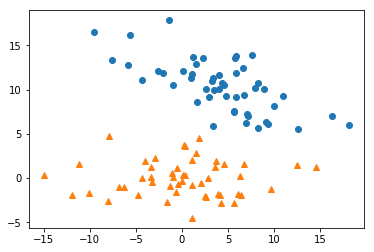

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(X[:,0],X[:,1], 'o')
plt.plot(X_pca[:,0],X_pca[:,1], '^')

plt.show()

In [7]:
print('Given a data point:')
a0 = np.array([11, 2])
print(a0)
a =  a0 - X_mean
print('zero mean first')
projected_a = np.matmul(a, eig_vecs)
print('PCA projection:')
print(projected_a)

Given a data point:
[11  2]
zero mean first
PCA projection:
[ 9.56916991 -5.12917339]
